<a href="https://colab.research.google.com/github/cnnwosu200/nhanes_inferential_2021_23/blob/main/nhanes_inferential_2021_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [ ]:
# Load the NHAHES dataset

df = pd.read_sas('/content/DEMO_L (1).xpt', format='xport')

df_bpxo = pd.read_sas('/content/BPXO_L.xpt', format='xport')

df_vid = pd.read_sas('/content/VID_L.xpt', format='xport')

df_hepb = pd.read_sas('/content/HEPB_S_L.xpt', format='xport')

df_kiq = pd.read_sas('/content/KIQ_U_L.xpt', format='xport')

df_paq = pd.read_sas('/content/PAQ_L.xpt', format='xport')

df_whq = pd.read_sas('/content/WHQ_L.xpt', format='xport')

In [ ]:
# Recode Marital Status
df['MARITAL_STATUS']= df['DMDMARTZ'].replace({
    1:'Married',
    2: 'Not married', 3: 'Not married',
    77: np.nan, 99: np.nan
})

df[['DMDMARTZ', 'MARITAL_STATUS']].head(10)



,DMDMARTZ,MARITAL_STATUS
0,1.0,Married
1,1.0,Married
2,1.0,Married
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,3.0,Not married
7,1.0,Married
8,1.0,Married
9,3.0,Not married


In [ ]:
# Recode educational level
df['educational_level'] = df['DMDEDUC2'].replace({
    5: 'Bachelors or higher',
    1: 'Less than a bachelors',
    2: 'Less than a bachelors',
    3: 'Less than a bachelors',
    4: 'Less than a bachelors',
    7: np.nan,
    9: np.nan
})

df[['DMDEDUC2', 'educational_level']].head(10)

,DMDEDUC2,educational_level
0,5.0,Bachelors or higher
1,5.0,Bachelors or higher
2,3.0,Less than a bachelors
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,2.0,Less than a bachelors
7,3.0,Less than a bachelors
8,4.0,Less than a bachelors
9,5.0,Bachelors or higher


In [ ]:
# Hepatitis B recoding

# Recode the 'LBXHBS' column within the df_hepb DataFrame
df_hepb['LBXHBS_recoded'] = df_hepb['LBXHBS'].replace({
    1: 'Positive',
    2: 'Negative',
    3: np.nan,
    4: np.nan
})

df_hepb[['LBXHBS', 'LBXHBS_recoded']].head(10)


,LBXHBS,LBXHBS_recoded
0,2.0,Negative
1,2.0,Negative
2,2.0,Negative
3,NaN,NaN
4,2.0,Negative
5,1.0,Positive
6,2.0,Negative
7,NaN,NaN
8,NaN,NaN
9,2.0,Negative


In [ ]:
# Weak/Failing Kidneys recoding

df_kiq['KIQ010_recoded'] = df_kiq['KIQ010'].replace({
    1: 'Yes',
    2: 'No',
    7: np.nan,
    9: np.nan,
})

df_kiq[['KIQ010', 'KIQ010_recoded']].sample(5)


,KIQ010,KIQ010_recoded
4905,1.0,Yes
4418,NaN,NaN
4482,1.0,Yes
4335,NaN,NaN
4398,1.0,Yes


In [ ]:
# Clean placeholder values

df_paq= df_paq.replace({
    7777: np.nan,
    9999: np.nan,
    ".": np.nan,
})

df_whq = df_whq.replace({
    7777: np.nan,
    9999: np.nan,
    ".": np.nan,
})


(df_paq == 7777).sum().sum(), (df_paq == 9999).sum().sum(), (df_paq == ".").sum().sum()
(df_whq == 7777).sum().sum(), (df_whq == 9999).sum().sum(), (df_whq == ".").sum().sum()


(np.int64(0), np.int64(0), np.int64(0))

educational_level  Bachelors or higher  Less than a bachelors
MARITAL_STATUS                                               
Married                           1631                   2503
Not married                        990                   2648
Chi-Square Statistic: 129.17381826322236
P-Value: 6.213197986632679e-30


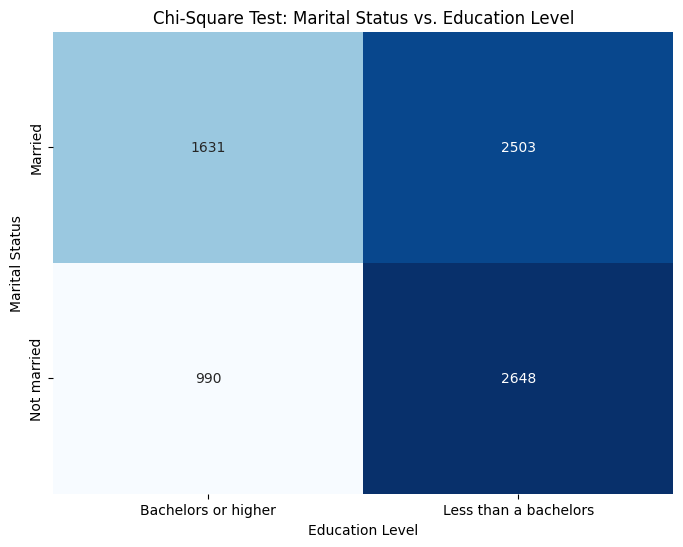

In [ ]:
# Questions for Analysis

# Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"

# Chi-Square Test
contigency_table = pd.crosstab(df['MARITAL_STATUS'], df['educational_level'])
print(contigency_table)

chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print(f'Chi-Square Statistic: {chi2}')
print(f'P-Value: {p}')

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contigency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Chi-Square Test: Marital Status vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Marital Status')
plt.show()



Interpretation: Yes, there is a highly statistically significant association between marital status and education level. It has a p-value less than 0.001.


t-statistic: -3.8699896847970154
p-value: 0.00010973792037934772


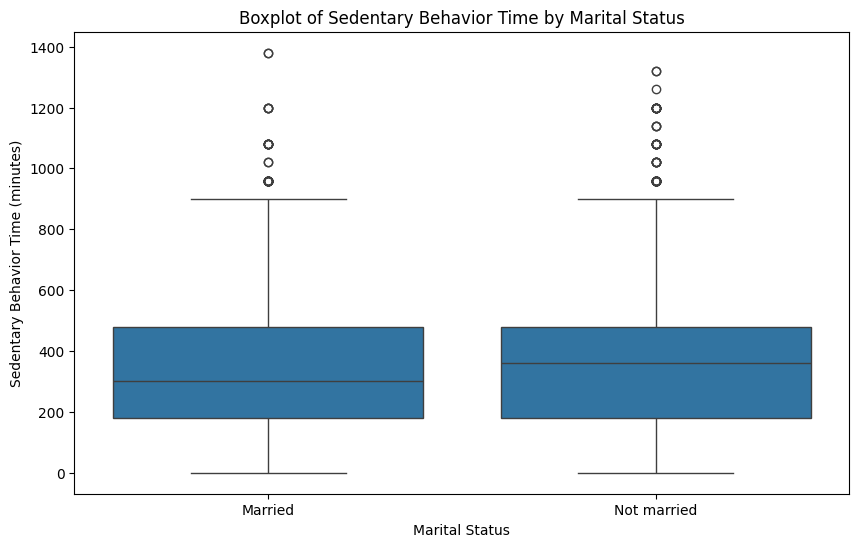

In [ ]:
# Question 2: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"

# Merge df and df_paq to bring MARITAL_STATUS and PAD680 together
# Use an inner merge to keep only common sequence numbers and drop NaNs later
merged_df = pd.merge(df[['SEQN', 'MARITAL_STATUS']], df_paq[['SEQN', 'PAD680']], on='SEQN', how='inner')

# Drop rows where MARITAL_STATUS or PAD680 is NaN for the t-test and visualization
merged_df_cleaned = merged_df.dropna(subset=['MARITAL_STATUS', 'PAD680'])

# t-test
married_sedentary = merged_df_cleaned[merged_df_cleaned['MARITAL_STATUS'] == 'Married']['PAD680']
not_married_sedentary = merged_df_cleaned[merged_df_cleaned['MARITAL_STATUS'] == 'Not married']['PAD680']


#Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='MARITAL_STATUS', y='PAD680', data=merged_df_cleaned)
plt.title('Boxplot of Sedentary Behavior Time by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Sedentary Behavior Time (minutes)')
plt.show()

Interpretation: The negative t-statistic(-3.87) shows that the mean sedentary behavior time for married individuals is lower than those who are not married. It revealed that there is a significant difference in mean sedentary behavior time between married and not married participants(p<0.001)

<Figure size 1000x600 with 0 Axes>

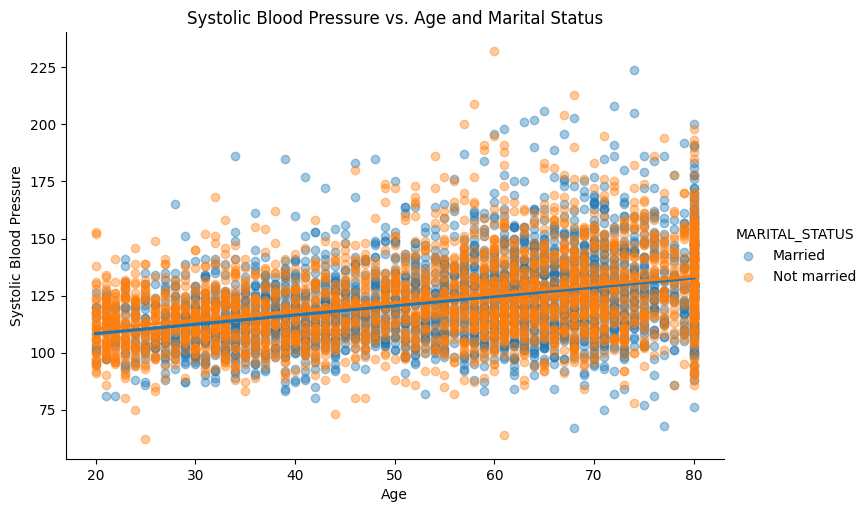

In [ ]:
# Question 3: "How do age and marital status affect systolic blood pressure?"

# merge main demographics in the question
merged_df = pd.merge(
    df[['SEQN', 'RIDAGEYR', 'MARITAL_STATUS']],
    df_bpxo[['SEQN', 'BPXOSY3']]
    , on='SEQN', how='inner'
)

# Drop missing values
merged_df_cleaned = merged_df.dropna(subset=['RIDAGEYR', 'MARITAL_STATUS', 'BPXOSY3'])

# Regression plot
# Visualization
plt.figure(figsize=(10, 6))
sns.lmplot(x='RIDAGEYR', y='BPXOSY3', hue='MARITAL_STATUS', data=merged_df_cleaned, aspect=1.5, scatter_kws={'alpha': 0.4})
plt.title('Systolic Blood Pressure vs. Age and Marital Status')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()

Interpretation: Looking at the visualization, systolic blood pressure tends to increase with age for both groups. The upward slope of the regression line shows a positive correlation between age and blood pressure. Including marital status, the not married line looks slightly higher across most ages, even though both "Married" and "Not married show similar upward trends.

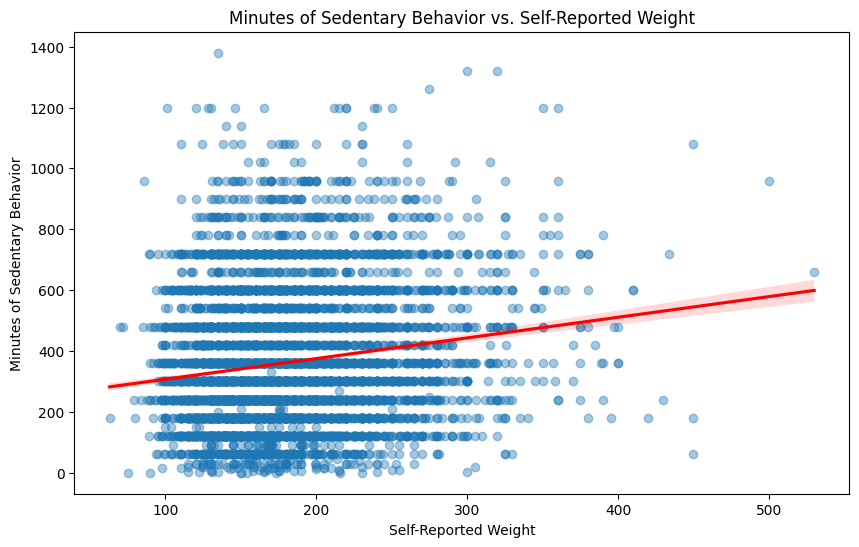

In [ ]:
# Question 4: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"

# merge weight and sedentary behavior data
merged_df = pd.merge(
    df_whq[['SEQN', 'WHD020']], # Added a comma here
    df_paq[['SEQN', 'PAD680']]
    , on='SEQN', how='inner'
)

# Drop missing values
merged_df_cleaned = merged_df.dropna(subset=['WHD020', 'PAD680'])

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='WHD020', y='PAD680', data=merged_df_cleaned, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title('Minutes of Sedentary Behavior vs. Self-Reported Weight')
plt.xlabel('Self-Reported Weight')
plt.ylabel('Minutes of Sedentary Behavior')
plt.show()

In [ ]:
# Correlation test Question 4

from scipy.stats import pearsonr

r, p = pearsonr(merged_df_cleaned['WHD020'], merged_df_cleaned['PAD680'])
print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.5f}")


Correlation coefficient (r): 0.156
P-value: 0.00000


Interpretation: The scatterplot shows the relationship between self-reported weight and minutes of sedentary behavior. The red regression line slopes slightly upward, and even though the data points are scattered, they generally are in the same direction, which shows a positive relationship between the two variables. The correlation coefficient(r) of 0.156 shows a weak positive correlation, so as weight increases, minutes of sedentary behavior tend to increase slightly.

In [ ]:
# Question 5(Creative Analysis) “Is there a difference in average Vitamin D levels between those with and without weak/failing kidneys?”

# merge vitamin D and Kidney data
merged_df = pd.merge(
    df_kiq[['SEQN', 'KIQ010_recoded']],
    df_vid[['SEQN', 'LBDVD2LC']]
    , on='SEQN', how='inner'
)

# Drop missing values
merged_df_cleaned = merged_df.dropna(subset=['KIQ010_recoded', 'LBDVD2LC'])


# Chi-Square Test
# Create a contingency table
contingency_table = pd.crosstab(
    merged_df_cleaned['KIQ010_recoded'],
    merged_df_cleaned['LBDVD2LC']
)

print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.3f}, p-value: {p:.5f}")

LBDVD2LC        5.397605e-79  1.000000e+00
KIQ010_recoded                            
3.0                       33           105
No                       121           432
Yes                      355          1130
Chi-square: 0.944, p-value: 0.62360


Interpretation: The chi-square statistic is small and the p-value 0.6236 is well above 0.05, meaning there is no statistically significant association between Vitamin D status and weak/failing kidneys in the dataset.